In [8]:
import os, glob
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import EfficientNetB4, EfficientNetB7, preprocess_input
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score


In [9]:
#model = EfficientNetB4(weights='imagenet', include_top=False)

file = open('CAP_0603\CAP_0603.json', 'r')
json = file.read()
file.close()
model = keras.models.model_from_json(json)
model.load_weights('CAP_0603\CAP_0603.h5') 


In [10]:
feature_list = []
paths = glob.glob('test-3\*')

for i, path in enumerate(paths):
    img = image.load_img(path, target_size=(256, 256))
    image_data = image.img_to_array(img)
    image_data = np.expand_dims(image_data, axis=0)
    #image_data = preprocess_input(image_data)
    feature = np.array(model.predict(image_data))
    feature_list.append(feature.flatten())
    

In [11]:
sil = []
kl = []
kmax = 10

pred_images = np.array(feature_list)

for k in range(2, kmax+1):
    kmeans2 = MiniBatchKMeans(n_clusters = k, verbose = 0).fit(pred_images)
    labels = kmeans2.labels_
    sil.append(silhouette_score(pred_images, labels, metric = 'euclidean'))
    kl.append(k)


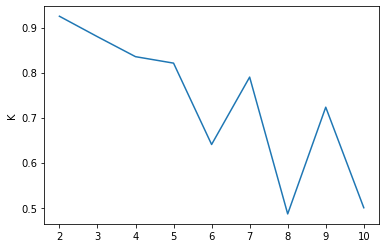

In [12]:
plt.plot(kl, sil)
plt.ylabel('Silhoutte Score')
plt.ylabel('K')
plt.show()

In [13]:
kmeans = MiniBatchKMeans(n_clusters = 2, verbose = 0).fit(pred_images)
labels = kmeans.labels_

Counter(np.array(labels))

Counter({1: 176, 0: 3824})

In [14]:
sil

[0.92499644,
 0.8795658,
 0.83526087,
 0.8209013,
 0.64031214,
 0.7899145,
 0.48618472,
 0.7231045,
 0.49989742]